In [1]:
import pandas as pd

In [3]:
df_drink = pd.read_csv('시도구군별_음주운전_데이터_2005_2019.csv',header=[0], index_col=[0,1])
df_drink.tail(5)

2005   2006   2007   2008   2009   2010   2011   2012   2013   2014  \
충북 청원군     78     96     96    122    111    110    129    140    127     50   
   청주시    314    386    369    364    413    432    499    542    498    513   
   충주시     94    137    212    145    141    112    191    147    150    137   
   합계     779    987   1001    991   1027    986   1260   1233   1162   1035   
합계 합계   26460  29990  28416  26873  28207  28641  28461  29093  26589  24043   

         2015   2016   2017   2018   2019  
충북 청원군      0      0      0      0      0  
   청주시    594    446    453    433    356  
   충주시    134    113    112    127     94  
   합계    1081    851    903    882    678  
합계 합계   24399  19769  19517  19381  15708

In [12]:
df_pop = pd.read_csv('행정구역_시군구별_인구수_2005_2019.csv', header=[0], index_col=[0,1])
df_pop.tail(5)

2005    2006    2007    2008    2009    2010    2011    2012  \
제주 합계    557569  558496  559258  560618  562663  571255  576156  583713   
   제주시   303499  403601  405458  407498  410378  417539  422790  429656   
   서귀포시   83027  154895  153800  153120  152285  153716  153366  154057   
   북제주군   97202       0       0       0       0       0       0       0   
   남제주군   73841       0       0       0       0       0       0       0   

           2013    2014    2015    2016    2017    2018    2019  
제주 합계    593806  607346  624395  641597  657083  667191  670989  
   제주시   438165  448834  459876  470665  478700  485946  489405  
   서귀포시  155641  158512  164519  170932  178383  181245  181584  
   북제주군       0       0       0       0       0       0       0  
   남제주군       0       0       0       0       0       0       0

In [13]:
df_drink.shape

(254, 15)

In [14]:
df_pop.shape

(366, 15)

In [15]:
row_list = []
for region, value in df_drink.iterrows():
#     print(value)
    for year, accident in dict(value).items():
        row_list.append({'음주운전':accident, '연도':year, '행정구역':region})

In [16]:
df_temp = pd.DataFrame(row_list)

In [17]:
df_temp

,음주운전,연도,행정구역
0,245,2005,"(강원, 강릉시)"
1,221,2006,"(강원, 강릉시)"
2,239,2007,"(강원, 강릉시)"
3,166,2008,"(강원, 강릉시)"
4,207,2009,"(강원, 강릉시)"
...,...,...,...
3805,24399,2015,"(합계, 합계)"
3806,19769,2016,"(합계, 합계)"
3807,19517,2017,"(합계, 합계)"
3808,19381,2018,"(합계, 합계)"


In [18]:
row_list = []
for region, value in df_pop.iterrows():
    for year, pop in dict(value).items():
        row_list.append({'인구수':pop, '연도':year, '행정구역':region})
df_temp2 = pd.DataFrame(row_list)
df_temp2

,인구수,연도,행정구역
0,48782274,2005,"(합계, 합계)"
1,48991779,2006,"(합계, 합계)"
2,49268928,2007,"(합계, 합계)"
3,49540367,2008,"(합계, 합계)"
4,49773145,2009,"(합계, 합계)"
...,...,...,...
5485,0,2015,"(제주, 남제주군)"
5486,0,2016,"(제주, 남제주군)"
5487,0,2017,"(제주, 남제주군)"
5488,0,2018,"(제주, 남제주군)"


In [19]:
df_heat = pd.merge(df_temp, df_temp2, on=['연도', '행정구역'])
df_heat

,음주운전,연도,행정구역,인구수
0,245,2005,"(강원, 강릉시)",224391
1,221,2006,"(강원, 강릉시)",222016
2,239,2007,"(강원, 강릉시)",220484
3,166,2008,"(강원, 강릉시)",218399
4,207,2009,"(강원, 강릉시)",217464
...,...,...,...,...
3790,24399,2015,"(합계, 합계)",51529338
3791,19769,2016,"(합계, 합계)",51696216
3792,19517,2017,"(합계, 합계)",51778544
3793,19381,2018,"(합계, 합계)",51826059


In [20]:
df_heat_origin = df_heat

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_excel('시도별_등록외국인수_2005_2019.xls', header=[0], index_col=[0])
df

FileNotFoundError: [Errno 2] No such file or directory: '시도별_등록외국인수_2005_2019.xls'

In [100]:
row_list = []
for region, value in df.iterrows():
    for year, forigner in dict(value).items():
        row_list.append({'등록외국인':forigner, '연도':year, '행정구역':region})
df_temp3 = pd.DataFrame(row_list)
df_temp3
df_heat = pd.merge(df_heat, df_temp3, on=['연도', '행정구역'])

In [103]:
df = pd.read_excel('시도별_재정자립도_2005_2019.xls', header=[0], index_col=[0])
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
강원,27.5,26.7,28.3,28.2,28.0,27.1,27.5,26.9,26.6,26.6,25.9,27.1,29.1,28.7,28.6
경기,76.2,75.2,74.9,76.3,75.9,72.8,72.5,72.6,71.6,67.7,66.6,67.4,70.1,69.9,68.4
경남,37.5,38.8,39.1,39.4,39.4,42.9,42.6,43.3,41.7,42.4,43.3,43.5,45.0,44.7,40.5
경북,29.6,27.8,28.9,28.7,27.7,29.3,28.1,28.3,28.0,29.1,30.0,33.3,32.7,33.3,31.9
광주,60.6,57.5,54.2,52.6,48.3,47.5,47.5,46.6,45.4,46.0,49.3,51.5,49.2,49.0,46.8
대구,73.9,70.7,63.9,59.5,54.7,56.3,53.5,52.8,51.8,51.7,53.1,57.1,56.6,54.2,51.6
대전,75.0,72.8,72.1,66.4,59.3,56.3,57.2,58.3,57.5,54.9,54.9,55.0,57.1,54.4,48.2
부산,73.4,70.2,62.9,60.5,58.3,57.6,56.4,57.4,56.6,57.4,56.8,60.1,60.1,58.7,56.7
서울,96.1,94.3,90.5,88.3,92.0,85.8,90.3,90.2,88.8,84.2,84.3,84.7,85.0,84.3,82.2
세종,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.8,50.6,54.8,59.0,70.5,69.2,72.7


In [105]:
row_list = []
for region, value in df.iterrows():
    for year, independence in dict(value).items():
        row_list.append({'재정자립도':independence, '연도':year, '행정구역':region})
df_temp3 = pd.DataFrame(row_list)
df_temp3
df_heat = pd.merge(df_heat, df_temp3, on=['연도', '행정구역'])

In [108]:
df = pd.read_excel('숙박및음식점종사자수_2006_2018.xls', header=[0], index_col=[0])
df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
강원,77332,78982,79328,81765,81008,82803,87813,90678,92554,91343,95219,99143,104485
경기,324397,340548,341231,349746,356053,376194,389016,409565,428925,440420,453998,471850,503155
경남,113555,116420,119213,121133,120946,126736,130319,136543,140785,141017,145843,147783,153097
경북,93968,95494,95671,95951,96364,98301,100954,105060,108617,109196,111419,112867,119131
광주,44706,46535,46103,46409,46535,47975,51432,53041,54157,55804,58203,59712,61476
대구,79543,82341,80002,81366,78210,82197,85301,88255,90692,90834,96657,97198,101342
대전,46653,47766,47932,48670,48606,51986,53537,56941,58490,60509,62009,63318,65647
부산,132724,131182,132693,132433,131036,136307,140763,145181,148084,148848,155207,157538,162889
서울,381829,390723,391062,401890,403256,416136,429913,442901,462331,479137,470397,474515,495092
세종,0,0,0,0,0,0,3589,4289,5749,7534,8356,9354,10997


In [113]:
row_list = []
for region, value in df.iterrows():
    for year, workers in dict(value).items():
        row_list.append({'숙박및음식점종사자수':workers, '연도':year, '행정구역':region})
df_temp3 = pd.DataFrame(row_list)
df_temp3
df_heat = pd.merge(df_heat, df_temp3, on=['연도', '행정구역'], how='outer')

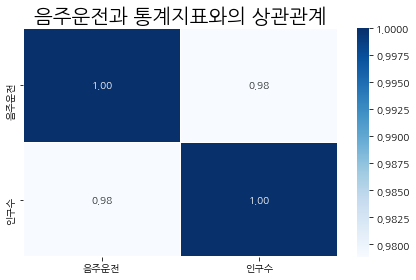

In [25]:
ax = sns.heatmap(df_heat.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.rcParams['font.family'] = 'NanumGothic'
plt.title('음주운전과 통계지표와의 상관관계', fontsize=20)
plt.tight_layout()
plt.savefig('음주운전과 통계지표와의 상관관계', dpi=199)